In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

## Here I used data from 'yahoo'; 'google' did not work** 

## Bank of America data
BAC = data.DataReader("BAC",'yahoo', start,end)

#CitiGroup
CG = data.DataReader("CG",'yahoo',start, end)

#Goldman Sachs
GS = data.DataReader("GS",'yahoo', start,end)

#JPMorgan Chase
JPM = data.DataReader("JPM",'yahoo', start, end)

#Morgan Stanley
MS = data.DataReader("MS",'yahoo', start, end)

#Wells Fargo
WF = data.DataReader("WF",'yahoo', start, end)


In [7]:
#list of ticker symbols
tickers =['BAC','CG','GS','JPM','MS','WF']

In [8]:
## Concating all bank stock data
bank_stocks =pd.concat([BAC,CG,GS,JPM,MS,WF], axis =1, keys=tickers)


In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock info']

In [9]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.717861   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.338535   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.384048   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.330940   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.353695   

             CG                 ...         MS                        \
           High Low Open Close  ...       Open      Close     Volume   
Date                            ...                                    
2006-01-03  NaN NaN  NaN   NaN  ...  57.169998  58.310001  5377000.0   
2006-01-04  NaN NaN  NaN   NaN  ...  58.700001  58.349998  7977800.0   
2006-01-05  NaN NaN  NaN   NaN  ...  58.549999  58.509998  5778000.0   
2006-01-06  NaN NaN  NaN   NaN  ...  58.770000  58.570000  6889800.0   
2006-01-09  NaN NaN  NaN   NaN  ...  58.630001  59.189999  4144500.0   

                              WF                                            \
            Adj Close       High        Low       Open      Close   Volume   
Date                                                                         
2006-01-03  38.006454  73.766388  72.228844  72.705605  72.884384  23400.0   
2006-01-04  38.032536  74.719902  72.884384  73.122765  74.016685  27200.0   
2006-01-05  38.136818  73.420738  72.526817  73.003578  72.669846  11000.0   
2006-01-06  38.175922  76.769966  73.897499  73.897499  75.744934  34800.0   
2006-01-09  38.580029  75.268173  74.195473  74.493446  74.195473  30900.0   

                       
            Adj Close  
Date                   
2006-01-03  58.224350  
2006-01-04  59.128902  
2006-01-05  58.052959  
2006-01-06  60.509521  
2006-01-09  59.271729  

[5 rows x 36 columns]

In [189]:
# using MultiIndex cross-section 'xs'
#Max close price
bank_stocks.xs('Close',level='Stock info', axis=1).max()

Bank Ticker
BAC     54.900002
CG      37.910000
GS     247.919998
JPM     70.080002
MS      89.300003
WF      99.868889
dtype: float64

In [75]:
returns = pd.DataFrame()

In [82]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,CG Return,GS Return,JPM Return,MS Return,WF Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,NaN,-0.013812,-0.014183,0.000686,0.015536
2006-01-05,0.001288,NaN,-0.000393,0.003029,0.002742,-0.018196
2006-01-06,-0.001501,NaN,0.014169,0.007046,0.001025,0.042316
2006-01-09,0.000644,NaN,0.012030,0.016242,0.010586,-0.020456


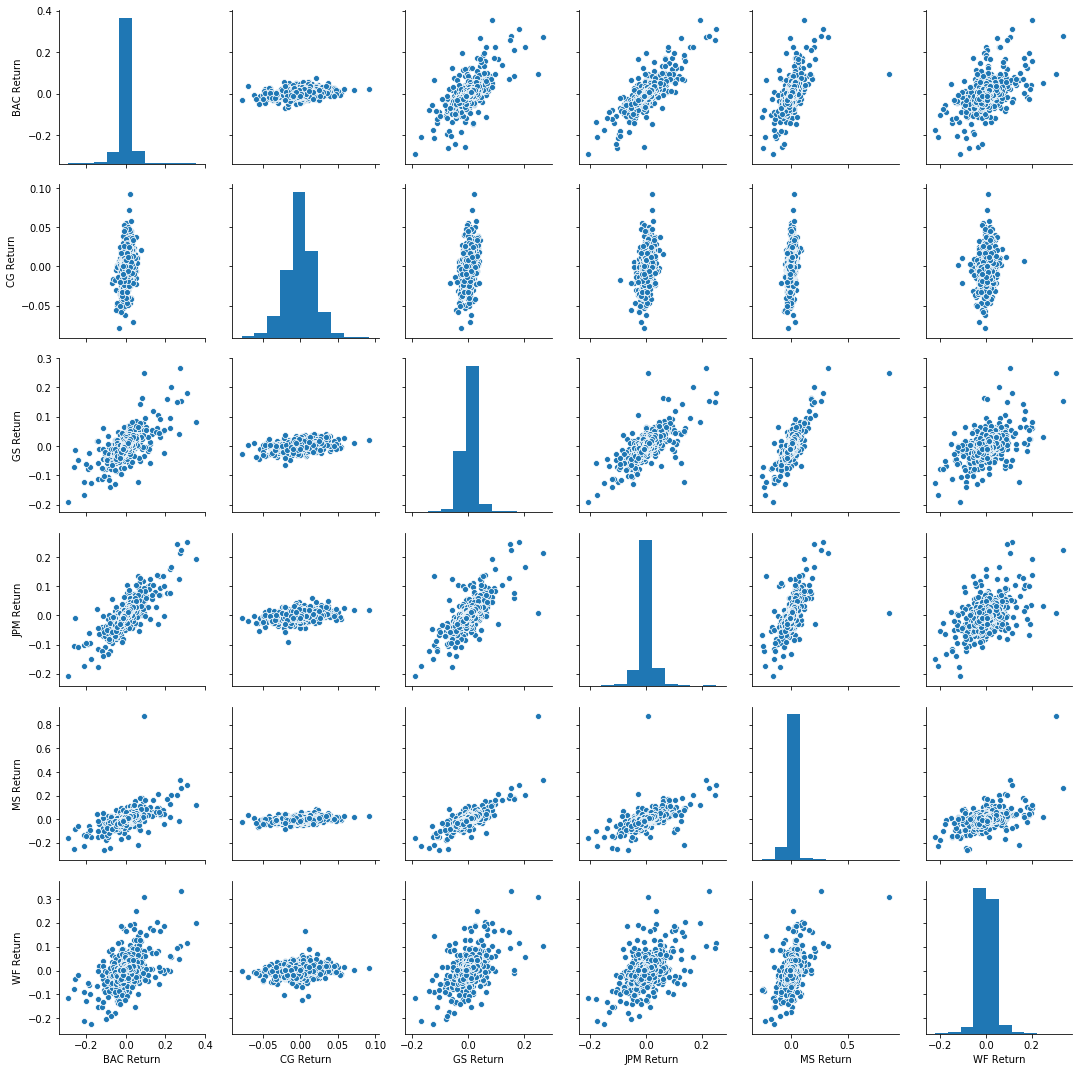

In [89]:
#to plot the stock returns

sns.pairplot(returns[1:])



In [106]:
# Worst Single Day Gain
## to find the indexes of min value occurance 
## Stck split for JPM

returns.idxmin()

BAC Return   2009-01-20
CG Return    2013-02-21
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WF Return    2008-09-29
dtype: datetime64[ns]

In [108]:
# Best Single Day Gain
## to find the indexes of max value occurance 
## Stck split for JPM

returns.idxmax()

BAC Return   2009-04-09
CG Return    2015-10-05
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WF Return    2009-03-10
dtype: datetime64[ns]

In [110]:
returns.std()

BAC Return    0.036647
CG Return     0.018727
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WF Return     0.035348
dtype: float64

In [111]:
# std for year 2015

returns.ix['2015-1-1':'2015-12-31'].std()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


BAC Return    0.016163
CG Return     0.019148
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WF Return     0.022002
dtype: float64

In [ ]:
## CG looks like with higher risk profile in 2015

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


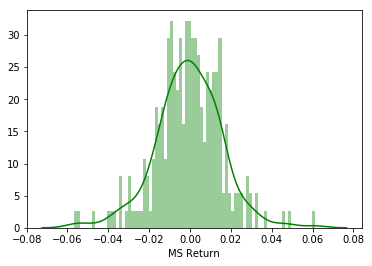

In [128]:
## Distplot with MS return for year 2015
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=80)

In [136]:
## most of my CG dataset in NULL
returns['CG Return'].ix['2008-01-01':'2008-12-12']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2008-01-02   NaN
2008-01-03   NaN
2008-01-04   NaN
2008-01-07   NaN
2008-01-08   NaN
2008-01-09   NaN
2008-01-10   NaN
2008-01-11   NaN
2008-01-14   NaN
2008-01-15   NaN
2008-01-16   NaN
2008-01-17   NaN
2008-01-18   NaN
2008-01-22   NaN
2008-01-23   NaN
2008-01-24   NaN
2008-01-25   NaN
2008-01-28   NaN
2008-01-29   NaN
2008-01-30   NaN
2008-01-31   NaN
2008-02-01   NaN
2008-02-04   NaN
2008-02-05   NaN
2008-02-06   NaN
2008-02-07   NaN
2008-02-08   NaN
2008-02-11   NaN
2008-02-12   NaN
2008-02-13   NaN
              ..
2008-10-31   NaN
2008-11-03   NaN
2008-11-04   NaN
2008-11-05   NaN
2008-11-06   NaN
2008-11-07   NaN
2008-11-10   NaN
2008-11-11   NaN
2008-11-12   NaN
2008-11-13   NaN
2008-11-14   NaN
2008-11-17   NaN
2008-11-18   NaN
2008-11-19   NaN
2008-11-20   NaN
2008-11-21   NaN
2008-11-24   NaN
2008-11-25   NaN
2008-11-26   NaN
2008-11-28   NaN
2008-12-01   NaN
2008-12-02   NaN
2008-12-03   NaN
2008-12-04   NaN
2008-12-05   NaN
2008-12-08   NaN
2008-12-09   NaN
2008-12-1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


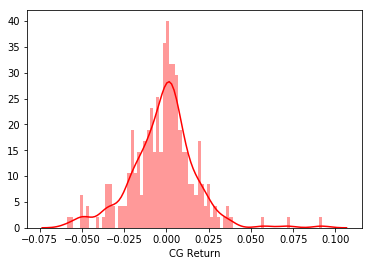

In [137]:
### Distplot for CG returns in 2008

sns.distplot(returns.ix['2015-01-01':'2015-12-31']['CG Return'],color='red',bins=80)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


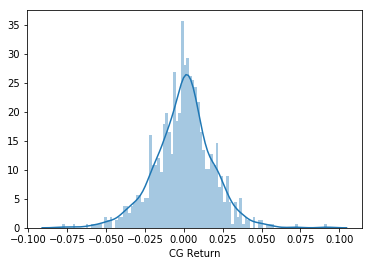

In [138]:
sns.distplot(returns['CG Return'], bins=100)

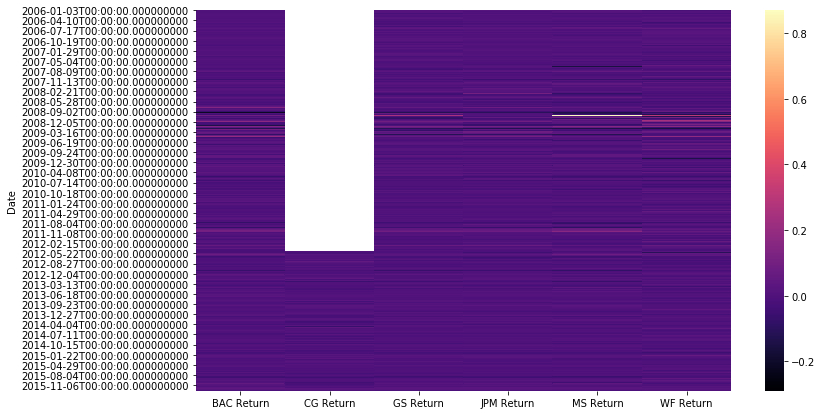

In [143]:
## to show NaN values,CG returns has all NaN until 2012-05

plt.figure(figsize=(12,7))
sns.heatmap(returns,cmap='magma')


In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

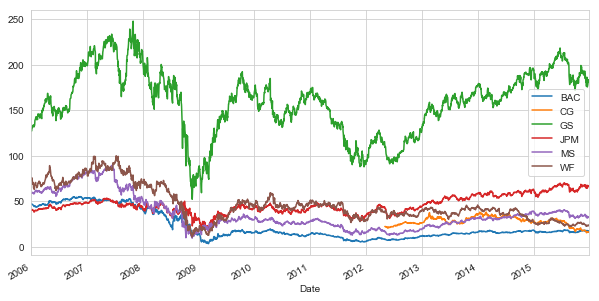

In [174]:
## Plotting 'Close' prices for each stock
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(10,5),label=tick)
    plt.legend()

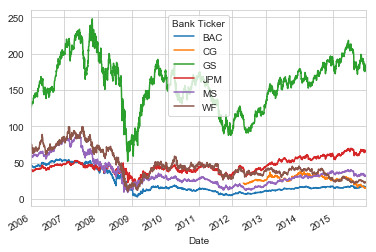

In [192]:
## plot using .xs 

bank_stocks.xs(key='Close', level='Stock info', axis=1).plot()

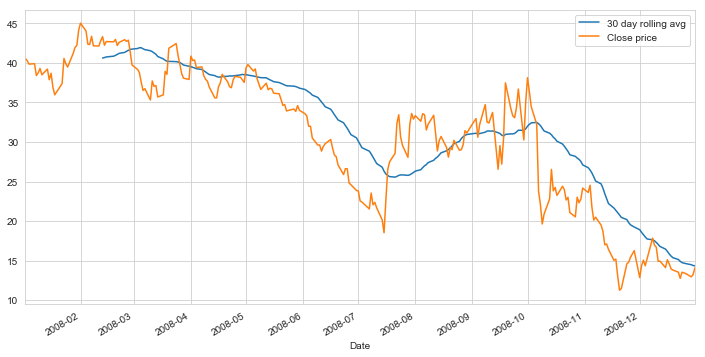

In [204]:
## Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008 
## NOTE- .loc is newer version of .xs

plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 day rolling avg')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label='Close price')
plt.legend()

In [215]:
## Correlation between the stocks Close Price

bank_stocks.xs(key='Close', level='Stock info', axis=1).corr()

Bank Ticker,BAC,CG,GS,JPM,MS,WF
Bank Ticker,,,,,,
BAC,1.000000,0.229437,0.550898,0.103874,0.944218,0.881423
CG,0.229437,1.000000,0.150595,0.096524,0.183396,0.644741
GS,0.550898,0.150595,1.000000,0.685286,0.683792,0.511103
JPM,0.103874,0.096524,0.685286,1.000000,0.250427,-0.031927
MS,0.944218,0.183396,0.683792,0.250427,1.000000,0.851856
WF,0.881423,0.644741,0.511103,-0.031927,0.851856,1.000000


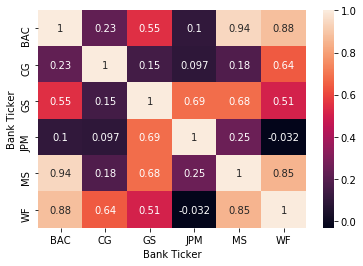

In [12]:
##heatmap of the correlation between the stocks Close Price.
sns.heatmap(bank_stocks.xs(key='Close', level='Stock info', axis=1).corr(), annot=True)

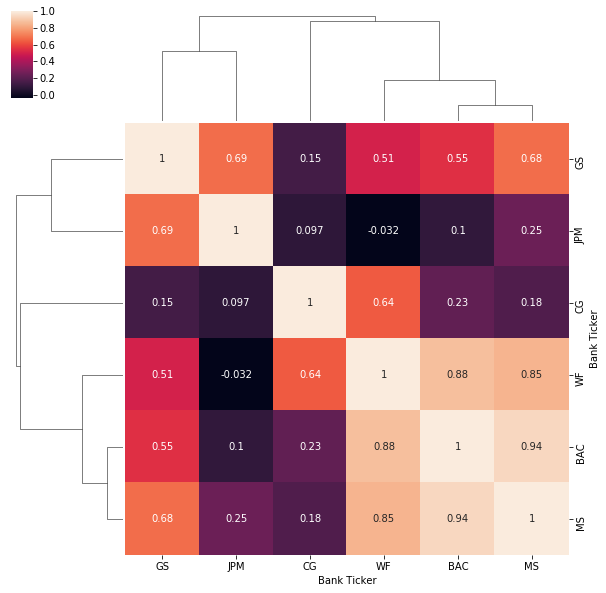

In [14]:
sns.clustermap(bank_stocks.xs(key='Close', level='Stock info', axis=1).corr(), annot= True)